In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import bokeh.models as bm
import bokeh.plotting as pl
from bokeh.io import output_notebook
from bokeh.palettes import Category10_10

# Read the CSV file with counts
df = pd.read_csv('unique_words_AM_nonToxic.csv')


# Amharic

## Tone

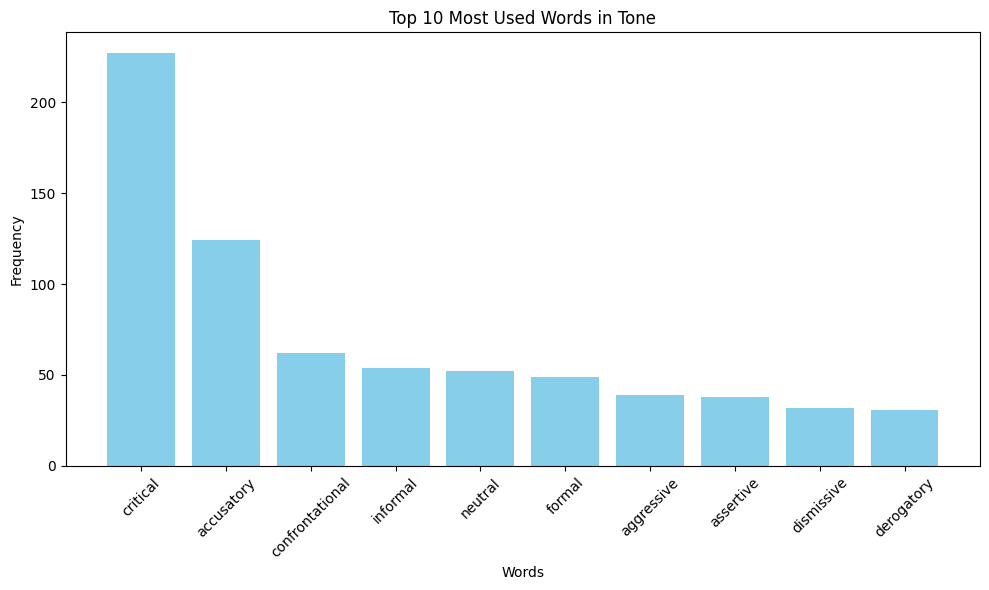

              Tone  Tone appears
0         critical         227.0
1       accusatory         124.0
2  confrontational          62.0
3         informal          54.0
4          neutral          52.0
5           formal          49.0
6       aggressive          39.0
7        assertive          38.0
8       dismissive          32.0
9       derogatory          31.0


In [3]:
# Plot histogram for the 'Tone' column
tone_df = df[['Tone', 'Tone appears']].sort_values(by='Tone appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(tone_df['Tone'], tone_df['Tone appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Tone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(tone_df)

## Language

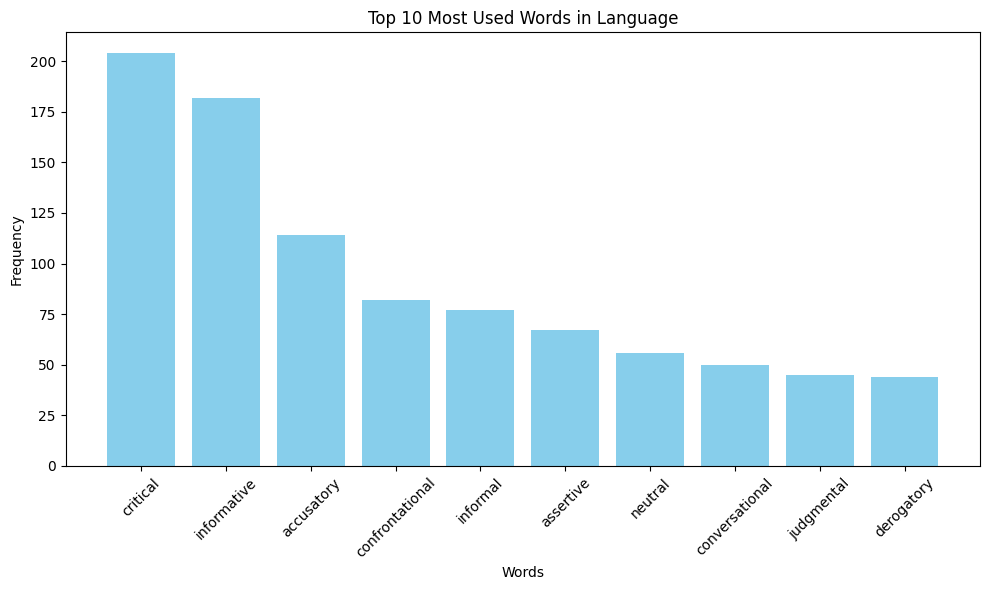

          Language  Language appears
0         critical             204.0
1      informative             182.0
2       accusatory             114.0
3  confrontational              82.0
4         informal              77.0
5        assertive              67.0
6          neutral              56.0
7   conversational              50.0
8       judgmental              45.0
9       derogatory              44.0


In [4]:
# Plot histogram for the 'Language' column
language_df = df[['Language', 'Language appears']].sort_values(by='Language appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(language_df['Language'], language_df['Language appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Language')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(language_df)

## Sentiment

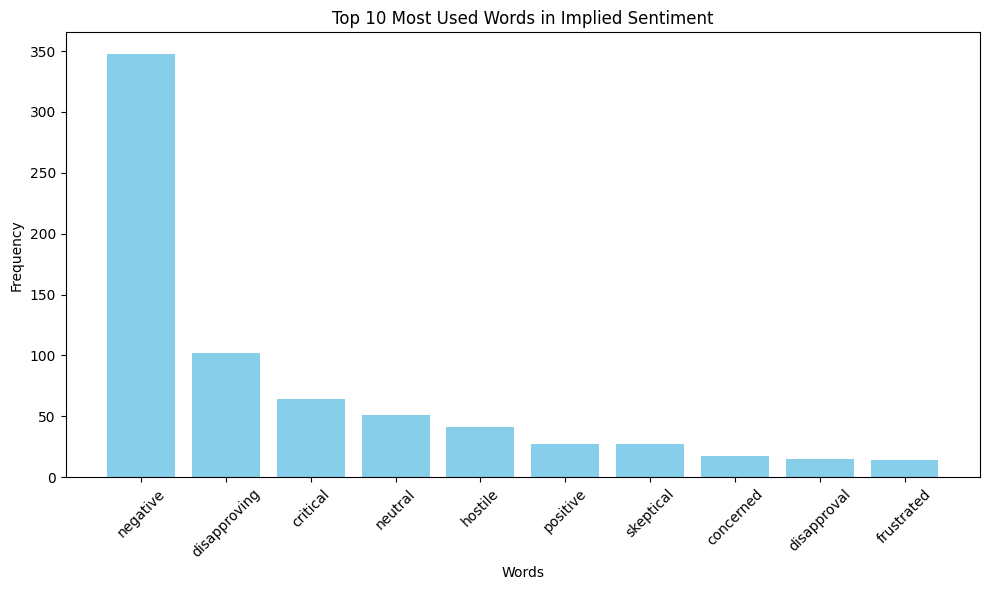

  Implied Sentiment  Implied Sentiment appears
0          negative                      348.0
1      disapproving                      102.0
2          critical                       64.0
3           neutral                       51.0
4           hostile                       41.0
5          positive                       27.0
6         skeptical                       27.0
7         concerned                       17.0
8       disapproval                       15.0
9        frustrated                       14.0


In [5]:
# Plot histogram for the 'Implied Sentiment' column
implied_sentiment_df = df[['Implied Sentiment', 'Implied Sentiment appears']].sort_values(by='Implied Sentiment appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(implied_sentiment_df['Implied Sentiment'], implied_sentiment_df['Implied Sentiment appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Implied Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(implied_sentiment_df)

## All together

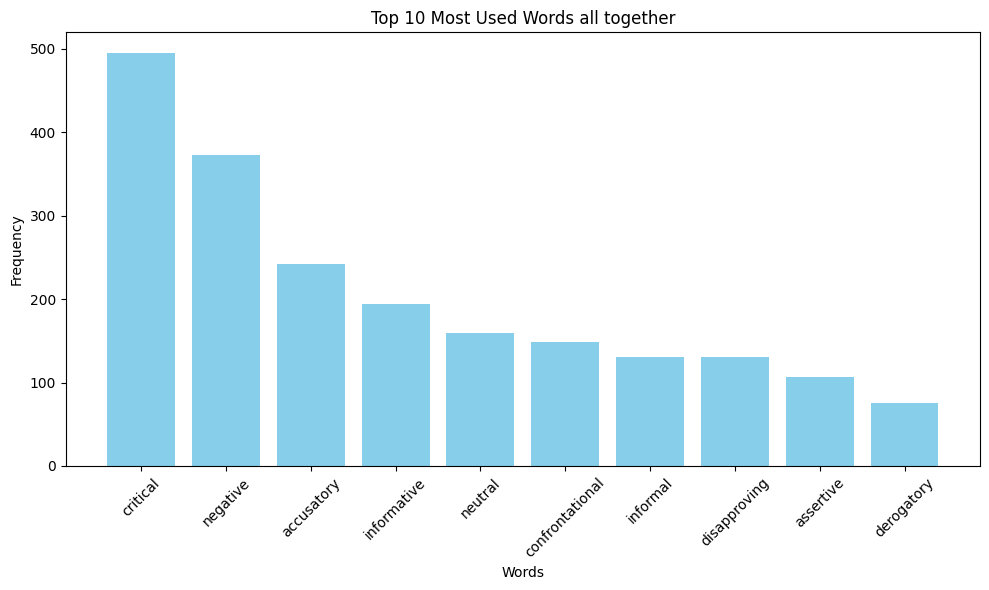

           combine  combine appears
0         critical            495.0
1         negative            373.0
2       accusatory            242.0
3      informative            194.0
4          neutral            159.0
5  confrontational            148.0
6         informal            131.0
7     disapproving            130.0
8        assertive            107.0
9       derogatory             75.0


In [6]:
# Plot histogram for the 'Combine' column
combine_df = df[['combine', 'combine appears']].sort_values(by='combine appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(combine_df['combine'], combine_df['combine appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words all together')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(combine_df)

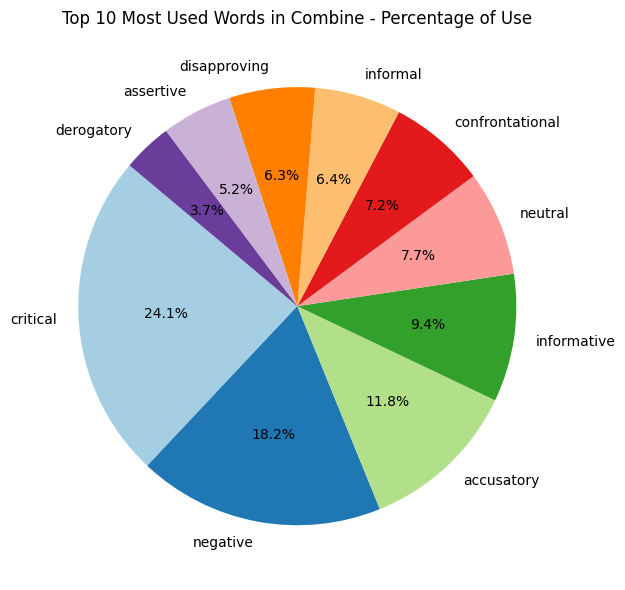

In [7]:
total_sentences = 1000

# Get the top 10 most used words from the 'combine' column
combine_df = df[['combine', 'combine appears']].sort_values(by='combine appears', ascending=False).head(10).reset_index(drop=True)

# Calculate the percentage of use for each word
combine_df['percentage'] = (combine_df['combine appears'] / total_sentences) * 100

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(combine_df['percentage'], labels=combine_df['combine'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Most Used Words in Combine - Percentage of Use')
plt.tight_layout()
plt.show()

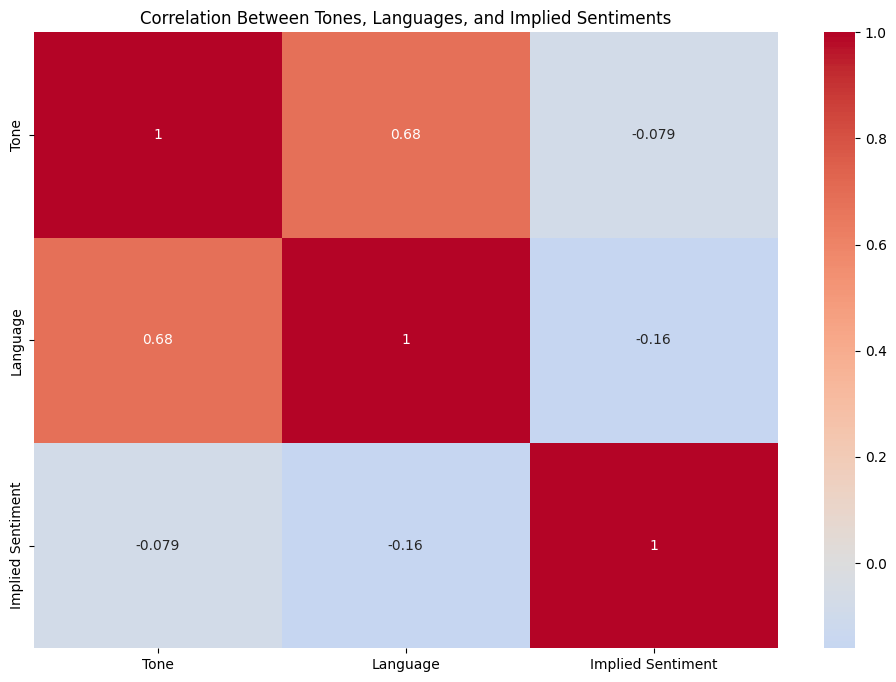

In [8]:
# Combine all data into one DataFrame for correlation analysis
combined_df = pd.DataFrame({
    'Tone': tone_df.set_index('Tone')['Tone appears'],
    'Language': language_df.set_index('Language')['Language appears'],
    'Implied Sentiment': implied_sentiment_df.set_index('Implied Sentiment')['Implied Sentiment appears']
}).fillna(0)

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Tones, Languages, and Implied Sentiments')
plt.show()

## Toxic Words

In [10]:
df_t = pd.read_csv('AM-nonToxicWordsList.csv')
df_toxic = df_t[['uniq sequences', 'number appears']].sort_values(by='number appears', ascending=False).head(10).reset_index(drop=True)
df_toxic['uniq sequences'] = df_toxic['uniq sequences'].astype(str)

# plt.figure(figsize=(10, 6))
# plt.bar(df_toxic['uniq sequences'], df_toxic['number appears'], color='skyblue')
# plt.xlabel('Words')
# plt.ylabel('Frequency')
# plt.title('Top 10 Most Toxic Words')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
print(df_toxic)

  uniq sequences  number appears
0           none             160
1            ችግር              30
2          አይደለም               9
3            መጥፎ               8
4          ወገንተኛ               7
5             ዝም               7
6            ፀያፍ               6
7            ጉዳት               5
8            አንተ               5
9            ስድብ               5
